## Crime Analysis Project
🎯 **Objectif du projet**
Analyser les tendances criminelles en France en utilisant des données géospatiales et temporelles, afin d'identifier des modèles de criminalité et de prédire les zones à risque.

- Visualiser et analyser les tendances de criminalité en France par région
- Identifier des zones à haut risque
- Faire une première modélisation simple pour détecter des patterns

### Plan du projet: 
1. Collecte et préparation des données
- 📂 Sources de données
    - Données Eurostat (crimes enregistrés par région NUTS-3)
    - Pas utilisé :
        - Données INSEE (indicateurs socio-économiques par région)
        - Données OpenStreetMap (infrastructures, transports, densité urbaine)
        - Données météorologiques (facteurs climatiques pouvant influencer les crimes)
- 🧹 Préparation des données
    - Nettoyage des valeurs aberrantes (NaN, erreurs de format)
    - Normalisation des noms de colonnes (geo → region_code, iccs → crime_type)
    - Conversion des années en format numérique (float)

2. Analyse exploratoire des données (EDA)
    - 📊 Statistiques descriptives
        - Distribution des types de crimes (iccs)
        - Comparaison crimes par région (geo) et par année
        - Détection des pics de criminalité (saisonnalité, jours spécifiques)
    - 🗺️ Analyse géospatiale
        - Mapping des crimes par région (folium, keplergl)
        - Cartographie des zones à haut risque (choropleth map)
        - Détection de clusters de criminalité (K-Means, DBSCAN)
    - 📈 Corrélations avec d’autres variables
        - Criminalité vs densité de population (INSEE)
        - Criminalité vs niveau de revenus (INSEE)
        - Criminalité vs météo (température, précipitations)

3. Modélisation et prédiction
   - Modèle de prédiction des crimes
        - Approche statistique: Régression linéaire, ARIMA (séries temporelles)
        - Machine Learning: Random Forest, XGBoost, LSTM pour la prédiction temporelle
        - Deep Learning: CNN pour l’analyse d’images satellite

    - Clustering des régions criminogènes
        - Segmentation des régions en groupes homogènes
        - K-Means, DBSCAN pour la détection de clusters à haut risque

4. Visualisation et rapport

- 📊 Dashboards interactifs (Streamlit, Plotly, Power BI)
    - Carte interactive des crimes par région
    - Graphiques temporels des tendances criminelles
    - Corrélation entre criminalité et indicateurs économiques

- 📜 Rapport et recommandations
    - Synthèse des résultats et proposition de mesures préventives
    - Identification des régions prioritaires pour les forces de l’ordre
    - Analyse des facteurs influençant la criminalité
- 

## 1. Collecte et préparation des données

In [72]:
# import lib 
import sys
sys.path.append('../src')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path_1 = "../Datasets/estat_crim_gen_reg.tsv.gz"
file_path_2 = "../Datasets/estat_crim_off_cat.tsv.gz"
df = pd.read_csv(file_path,compression="gzip", sep="\t")

df_2 =  pd.read_csv(file_path_2,compression="gzip", sep="\t")

In [73]:
display(df.head())
display(df_2.head())

,"freq,unit,iccs,geo\TIME_PERIOD",2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"A,NR,ICCS0101,AL",88,82,118,124,126,107,98,54,71,52,51,58,52,61,42
1,"A,NR,ICCS0101,AL0",88,82,118,124,126,107,98,54,71,52,51,58,52,61,42
2,"A,NR,ICCS0101,AL01",40,37,54,53,51,49,41,19,22,19,26,18,21,21,17
3,"A,NR,ICCS0101,AL011",3,4,6,8,5,7,4,1,0,3,5,3,0,4,1
4,"A,NR,ICCS0101,AL012",8,15,15,16,8,13,11,5,4,6,6,4,9,3,5


,"freq,iccs,unit,geo\TIME_PERIOD",2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"A,ICCS0101,NR,AL",88,82,118,124,125,107,98,54,71,52,51,58,52,61,42
1,"A,ICCS0101,NR,AT",58,51,61,80,88,63,43,42,49,61,73,74,54,59,65
2,"A,ICCS0101,NR,BA",66,67,54,49,60,46,49,56,42,34,36,37,42,31,34
3,"A,ICCS0101,NR,BE",204,189,189,214,206,204,210,231,175,198,192,147,150,154,179
4,"A,ICCS0101,NR,BG",172,150,148,128,141,109,112,126,79,95,92,81,67,89,76


In [45]:
df[['freq', 'unit', 'iccs', 'geo']] = df.iloc[:, 0].str.split(',', expand=True)
df.drop(df.columns[0], axis=1, inplace=True)

In [46]:
df.columns

Index(['2008 ', '2009 ', '2010 ', '2011 ', '2012 ', '2013 ', '2014 ', '2015 ',
       '2016 ', '2017 ', '2018 ', '2019 ', '2020 ', '2021 ', '2022 ', 'freq',
       'unit', 'iccs', 'geo'],
      dtype='object')

In [49]:
cols = ['freq', 'unit', 'iccs', 'geo'] + ['2008 ', '2009 ', '2010 ', '2011 ', '2012 ', '2013 ', '2014 ', '2015 ',
       '2016 ', '2017 ', '2018 ', '2019 ', '2020 ', '2021 ', '2022 ']
df = df[cols]
df.columns = df.columns.str.strip()
df.head()

,freq,unit,iccs,geo,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,A,NR,ICCS0101,AL,88,82,118,124,126,107,98,54,71,52,51,58,52,61,42
1,A,NR,ICCS0101,AL0,88,82,118,124,126,107,98,54,71,52,51,58,52,61,42
2,A,NR,ICCS0101,AL01,40,37,54,53,51,49,41,19,22,19,26,18,21,21,17
3,A,NR,ICCS0101,AL011,3,4,6,8,5,7,4,1,0,3,5,3,0,4,1
4,A,NR,ICCS0101,AL012,8,15,15,16,8,13,11,5,4,6,6,4,9,3,5


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24338 entries, 0 to 24337
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   freq    24338 non-null  object
 1   unit    24338 non-null  object
 2   iccs    24338 non-null  object
 3   geo     24338 non-null  object
 4   2008    24338 non-null  object
 5   2009    24338 non-null  object
 6   2010    24338 non-null  object
 7   2011    24338 non-null  object
 8   2012    24338 non-null  object
 9   2013    24338 non-null  object
 10  2014    24338 non-null  object
 11  2015    24338 non-null  object
 12  2016    24338 non-null  object
 13  2017    24338 non-null  object
 14  2018    24338 non-null  object
 15  2019    24338 non-null  object
 16  2020    24338 non-null  object
 17  2021    24338 non-null  object
 18  2022    24338 non-null  object
dtypes: object(19)
memory usage: 3.5+ MB


In [53]:
# convert obj to numeric for years columns
cols_to_check = ['2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022']
df[cols_to_check] = df[cols_to_check].apply(pd.to_numeric, errors="coerce")

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24338 entries, 0 to 24337
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   freq    24338 non-null  object 
 1   unit    24338 non-null  object 
 2   iccs    24338 non-null  object 
 3   geo     24338 non-null  object 
 4   2008    8828 non-null   float64
 5   2009    8440 non-null   float64
 6   2010    9901 non-null   float64
 7   2011    9940 non-null   float64
 8   2012    15522 non-null  float64
 9   2013    17402 non-null  float64
 10  2014    17704 non-null  float64
 11  2015    18810 non-null  float64
 12  2016    21583 non-null  float64
 13  2017    21820 non-null  float64
 14  2018    23054 non-null  float64
 15  2019    23180 non-null  float64
 16  2020    16807 non-null  float64
 17  2021    17007 non-null  float64
 18  2022    17445 non-null  float64
dtypes: float64(15), object(4)
memory usage: 3.5+ MB


In [58]:
df[cols_to_check].isnull().sum()
df.isnull().sum()
#df[df[cols_to_check].isnull()]

freq        0
unit        0
iccs        0
geo         0
2008    15510
2009    15898
2010    14437
2011    14398
2012     8816
2013     6936
2014     6634
2015     5528
2016     2755
2017     2518
2018     1284
2019     1158
2020     7531
2021     7331
2022     6893
dtype: int64

In [59]:
missing_by_year = df.isnull().sum().sort_values(ascending=False)
missing_by_year = missing_by_year[missing_by_year > 0]  # On ne garde que les colonnes avec des valeurs manquantes

print(missing_by_year)

2009    15898
2008    15510
2010    14437
2011    14398
2012     8816
2020     7531
2021     7331
2013     6936
2022     6893
2014     6634
2015     5528
2016     2755
2017     2518
2018     1284
2019     1158
dtype: int64


In [69]:
# Garder uniquement France

#eu_countries = ["DE", "FR", "IT", "PL", "ES", "BE", "RO", "NL", "AT", "HR", 
# "PT", "BG", "SE", "FI", "CZ", "DK", "SI", "HU", "LT", "SK", "LV", "IE", "EE", "MT", "LU", "CY"]

#df_eu = df[df["geo"].str[:2].isin(eu_countries)]

df_fr = df[df["geo"].str.startswith("FR")]


In [70]:
print(df_fr.isnull().sum())

freq       0
unit       0
iccs       0
geo        0
2008    1714
2009    1714
2010    1714
2011    1714
2012    1714
2013    1714
2014    1714
2015    1714
2016       0
2017       0
2018       0
2019       0
2020       0
2021       0
2022       0
dtype: int64


In [75]:
df_fr = df_fr.drop(columns=[str(year) for year in range(2008, 2016)])

In [76]:
df_fr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1714 entries, 905 to 23596
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   freq    1714 non-null   object 
 1   unit    1714 non-null   object 
 2   iccs    1714 non-null   object 
 3   geo     1714 non-null   object 
 4   2016    1714 non-null   float64
 5   2017    1714 non-null   float64
 6   2018    1714 non-null   float64
 7   2019    1714 non-null   float64
 8   2020    1714 non-null   float64
 9   2021    1714 non-null   float64
 10  2022    1714 non-null   float64
dtypes: float64(7), object(4)
memory usage: 160.7+ KB


In [77]:
display(df_fr["freq"].value_counts())
display(df_fr["unit"].value_counts())
display(df_fr["iccs"].value_counts())
display(df_fr["geo"].value_counts())

freq
A    1714
Name: count, dtype: int64

unit
NR         857
P_HTHAB    857
Name: count, dtype: int64

iccs
ICCS0401      286
ICCS0501      286
ICCS05012     286
ICCS0502      286
ICCS050211    286
ICCS0101      284
Name: count, dtype: int64

geo
FR       12
FRJ23    12
FRJ12    12
FRJ13    12
FRJ15    12
         ..
FRF11    12
FRF12    12
FRF2     12
FRF21    12
FRJ14    10
Name: count, Length: 143, dtype: int64

In [82]:
df_fr = df_fr.drop(columns = "freq")

In [87]:
df_fr["geo"].value_counts().sort_values(ascending=False)

geo
FR       12
FR107    12
FR10     12
FR101    12
FR102    12
         ..
FRY4     12
FRY40    12
FRY5     12
FRY50    12
FRJ14    10
Name: count, Length: 143, dtype: int64

In [88]:
# rename columns

df_fr.rename(columns={"geo": "region_code", "iccs": "crime_type"}, inplace=True)


In [90]:
# reset index
df_fr.reset_index(drop=True, inplace=True)

In [91]:
df_fr.head()

,unit,crime_type,region_code,2016,2017,2018,2019,2020,2021,2022
0,NR,ICCS0101,FR,666.0,674.0,650.0,719.0,655.0,701.0,784.0
1,NR,ICCS0101,FR1,92.0,103.0,98.0,123.0,98.0,133.0,113.0
2,NR,ICCS0101,FR10,92.0,103.0,98.0,123.0,98.0,133.0,113.0
3,NR,ICCS0101,FR101,25.0,27.0,28.0,31.0,15.0,19.0,27.0
4,NR,ICCS0101,FR102,4.0,12.0,4.0,12.0,1.0,14.0,9.0


## 2. Analyse Exploratoire des Données (EDA)

Nous allons maintenant explorer les données pour identifier des tendances, comparer les régions et années, et détecter d’éventuels pics de criminalité.

In [92]:
df_fr.describe()

,2016,2017,2018,2019,2020,2021,2022
count,1.714000e+03,1.714000e+03,1.714000e+03,1.714000e+03,1.714000e+03,1.714000e+03,1.714000e+03
mean,5.698435e+03,5.649761e+03,5.404864e+03,5.417001e+03,4.367244e+03,4.430299e+03,4.933908e+03
std,4.167657e+04,4.143805e+04,4.036891e+04,4.104996e+04,3.264381e+04,3.356038e+04,3.772273e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.050450e+02,1.052875e+02,9.714500e+01,9.057250e+01,7.283750e+01,6.955750e+01,7.626500e+01
50%,4.660000e+02,4.648300e+02,4.138600e+02,4.024700e+02,3.256900e+02,3.185300e+02,3.490000e+02
75%,2.003020e+03,1.986500e+03,1.862098e+03,1.795355e+03,1.437000e+03,1.436503e+03,1.596810e+03
max,1.463708e+06,1.454871e+06,1.421134e+06,1.439752e+06,1.143572e+06,1.181051e+06,1.333507e+06


- Il y a une baisse notable des crimes en 2020 (~ 4367), probablement à cause de la pandémie COVID-19 (confinements).

## Distribution des types de crimes en France

/var/folders/m4/rl8q4_8s3531vrprrghc32pm0000gn/T/ipykernel_10401/3651433600.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_fr["crime_type"], order=df_fr["crime_type"].value_counts().index, palette="viridis")


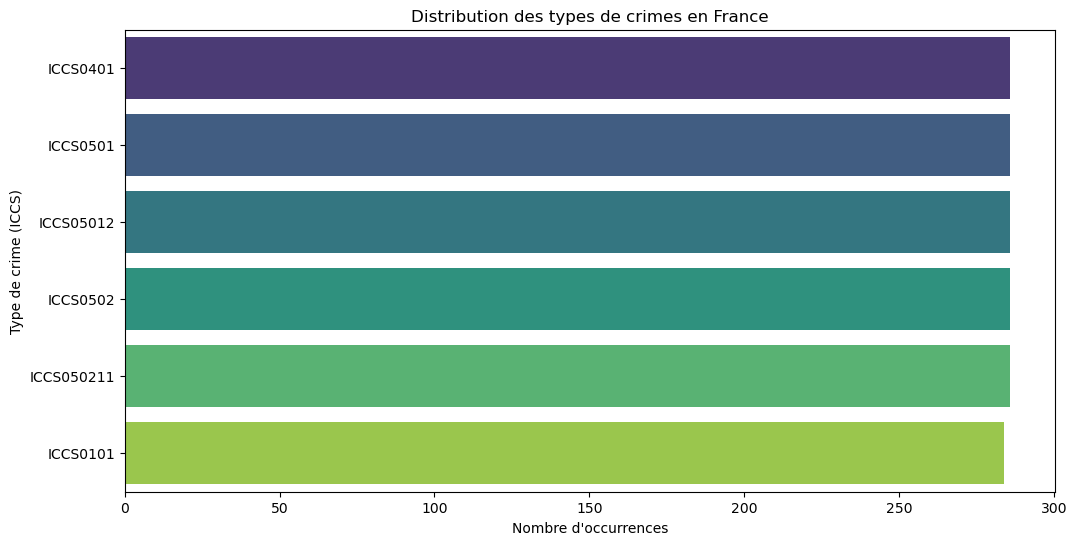

In [93]:
plt.figure(figsize=(12,6))
sns.countplot(y=df_fr["crime_type"], order=df_fr["crime_type"].value_counts().index, palette="viridis")
plt.xlabel("Nombre d'occurrences")
plt.ylabel("Type de crime (ICCS)")
plt.title("Distribution des types de crimes en France")
plt.show()


## Distribution des crimes par année (Boxplot)

,unit,crime_type,region_code,2016,2017,2018,2019,2020,2021,2022
0,NR,ICCS0101,FR,666.0,674.0,650.0,719.0,655.0,701.0,784.0
1,NR,ICCS0101,FR1,92.0,103.0,98.0,123.0,98.0,133.0,113.0
2,NR,ICCS0101,FR10,92.0,103.0,98.0,123.0,98.0,133.0,113.0
3,NR,ICCS0101,FR101,25.0,27.0,28.0,31.0,15.0,19.0,27.0
4,NR,ICCS0101,FR102,4.0,12.0,4.0,12.0,1.0,14.0,9.0


/var/folders/m4/rl8q4_8s3531vrprrghc32pm0000gn/T/ipykernel_10401/3076605221.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_fr[year] for year in years], labels=years, patch_artist=True)


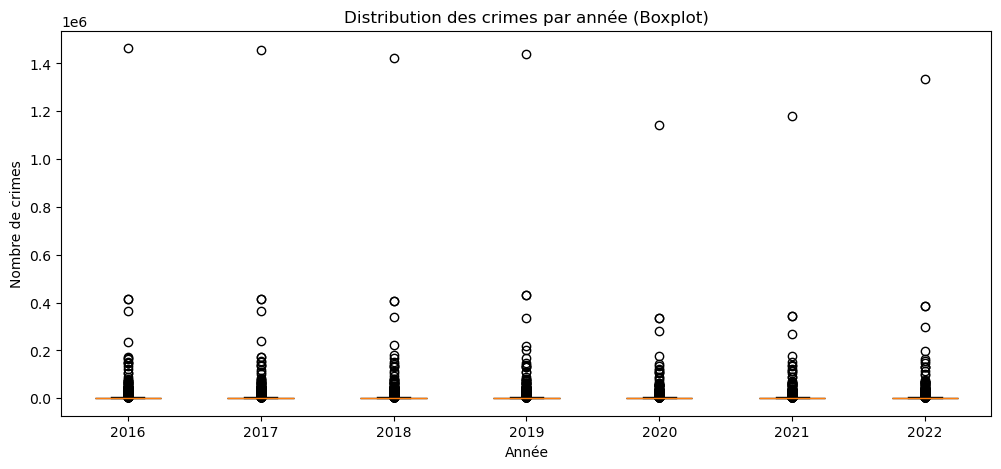

In [105]:
display(df_fr.head())

# Sélectionner uniquement les colonnes correspondant aux années
years = ["2016", "2017", "2018", "2019", "2020", "2021", "2022"]

plt.figure(figsize=(12, 5))

# Tracer le boxplot
plt.boxplot([df_fr[year] for year in years], labels=years, patch_artist=True)

plt.xlabel("Année")
plt.ylabel("Nombre de crimes")
plt.title("Distribution des crimes par année (Boxplot)")

plt.show()



In [127]:
df_fr.columns

Index(['unit', 'crime_type', 'region_code', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022'],
      dtype='object')

In [132]:
columns = [ '2016', '2017', '2018', '2019', '2020', '2021', '2022']

df_fr_regions = df_fr.groupby(['region_code','crime_type' ])[columns].sum().sort_values(by=years, ascending=False).reset_index()
df_fr_regions.head()

,region_code,crime_type,2016,2017,2018,2019,2020,2021,2022
0,FR,ICCS0502,1465904.49,1457048.63,1423254.27,1441895.20,1145270.71,1182796.65,1335471.74
1,FR1,ICCS0502,417609.23,416407.35,409954.32,434260.45,340139.93,347600.28,386861.46
2,FR10,ICCS0502,417609.23,416407.35,409954.32,434260.45,340139.93,347600.28,386861.46
3,FR,ICCS0501,366499.16,366790.19,339477.73,334773.60,279587.69,270005.49,296698.50
4,FR,ICCS05012,236386.20,241071.29,223459.90,220627.94,175160.80,176925.12,196114.52


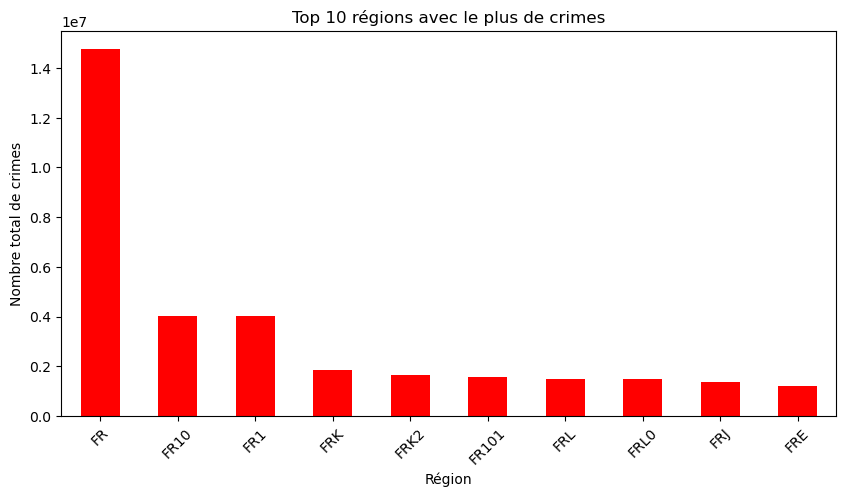

In [138]:
## Les régions avec le plus de crimes au total

top_regions = df_fr_regions.groupby('region_code')[columns].sum().sum(axis=1).sort_values(ascending=False).head(10)
top_regions.plot(kind='bar', figsize=(10, 5), color='red')
plt.title("Top 10 régions avec le plus de crimes")
plt.xlabel("Région")
plt.ylabel("Nombre total de crimes")
plt.xticks(rotation=45)
plt.show()

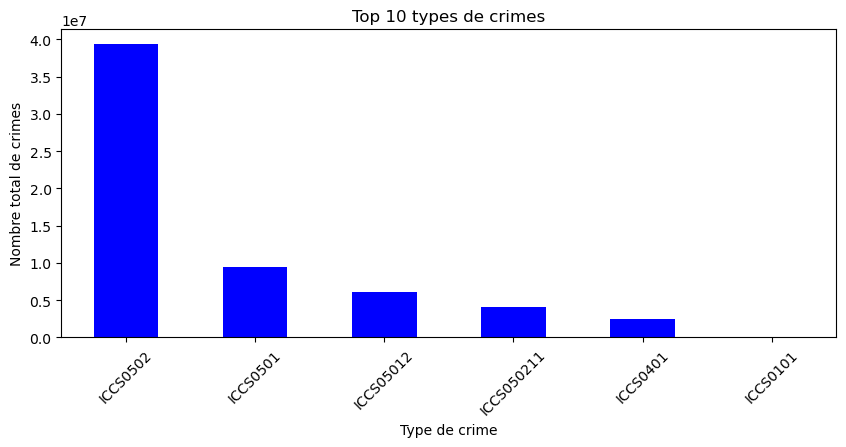

crime_type
ICCS0502      39375776.27
ICCS0501       9437527.57
ICCS05012      6148465.30
ICCS050211     4061674.02
ICCS0401       2491092.36
ICCS0101         20654.92
dtype: float64

In [140]:
## Trouver les crimes les plus fréquents en France

top_crimes = df_fr_regions.groupby('crime_type')[columns].sum().sum(axis=1).sort_values(ascending=False).head(10)
top_crimes.plot(kind='bar', figsize=(10, 4), color='blue')
plt.title("Top 10 types de crimes")
plt.xlabel("Type de crime")
plt.ylabel("Nombre total de crimes")
plt.xticks(rotation=45)
plt.show()
top_crimes